# __Random Forest__
## Pipeline 1

In [1]:
#import pandas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

# load dataset
rfdata = pd.read_csv('pipeline1.csv', header=0)
rfdata.head()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew,SpecialDay_0.0,...,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,SeasonBins_1,SeasonBins_2,SeasonBins_3,SeasonBins_4,RevenueEnc
0,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.503281,1.982547,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
1,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.074189,-1.036838,1.569866,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
2,-0.990128,-0.996659,-0.520831,-0.492257,-1.922123,-2.096783,1.503281,1.982547,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
3,-0.990128,-0.996659,-0.520831,-0.492257,-1.574524,-1.875436,1.354717,1.832073,-0.533268,1,...,0,0,1,1,0,1,0,0,0,0
4,-0.990128,-0.996659,-0.520831,-0.492257,-0.442610,0.057515,1.002737,0.722460,-0.533268,1,...,0,0,1,0,1,1,0,0,0,0


In [2]:
rfdata.columns.values

array(['AdministrativeSkew', 'Administrative_DurationSkew',
       'InformationalSkew', 'Informational_DurationSkew',
       'ProductRelatedSkew', 'ProductRelated_DurationSkew',
       'BounceRatesSkew', 'ExitRatesSkew', 'PageValuesSkew',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',


In [3]:
feature_cols = ['AdministrativeSkew', 'Administrative_DurationSkew',
       'InformationalSkew', 'Informational_DurationSkew',
       'ProductRelatedSkew', 'ProductRelated_DurationSkew',
       'BounceRatesSkew', 'ExitRatesSkew', 'PageValuesSkew',
       'SpecialDay_0.0', 'SpecialDay_0.2', 'SpecialDay_0.4',
       'SpecialDay_0.6', 'SpecialDay_0.8', 'SpecialDay_1.0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'OperatingSystems_8', 'Browser_1',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_1', 'Region_2', 'Region_3',
       'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19',
       'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Weekend_False', 'Weekend_True',
       'SeasonBins_1', 'SeasonBins_2', 'SeasonBins_3', 'SeasonBins_4']
X = rfdata[feature_cols] # Features
y = rfdata.RevenueEnc # Target variable

### Split Data

In [4]:
# split X and y into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=200)

### Train & Predict the Data

In [5]:
#Create a Gaussian Classifier
clf = RandomForestClassifier(random_state=200)

#Train the model using the training sets
clf.fit(X_train,y_train)

# Predict
y_pred = clf.predict(X_test)

### Evaluate the Prediction

In [6]:
print("F1_Score:",metrics.f1_score(y_test, y_pred))
print("AUC:",metrics.roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1_Score: 0.6080661840744571
AUC: 0.7405496209799252
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3126
           1       0.75      0.51      0.61       573

    accuracy                           0.90      3699
   macro avg       0.83      0.74      0.77      3699
weighted avg       0.89      0.90      0.89      3699



## __SMOTE__

In [12]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 123) 
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train) 

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
clf=RandomForestClassifier(random_state=200)
# fit the model with data
clf.fit(X_train_smote,y_train_smote)
# predict the model
y_pred_smote=clf.predict(X_test)

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_smote)
cnf_matrix

array([[2920,  206],
       [ 193,  380]])

In [15]:
print("F1_Score:",metrics.f1_score(y_test, y_pred_smote))
print("AUC:",metrics.roc_auc_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))

F1_Score: 0.6557377049180327
AUC: 0.7986386764612287
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3126
           1       0.65      0.66      0.66       573

    accuracy                           0.89      3699
   macro avg       0.79      0.80      0.80      3699
weighted avg       0.89      0.89      0.89      3699



## __Feature Selection in Scikit-learn__
Find important features or selecting features in the dataset. In scikit-learn, you can perform this task in the following steps:

- First, create a random forests model.
- Second, use the feature importance variable to see feature importance scores.
- Third, visualize these scores using the seaborn library.

In [16]:
clf=RandomForestClassifier(random_state=200)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=200,
                       verbose=0, warm_start=False)

In [17]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False).head(26)
feature_imp

PageValuesSkew                   0.317667
ExitRatesSkew                    0.084269
ProductRelated_DurationSkew      0.083799
ProductRelatedSkew               0.072358
Administrative_DurationSkew      0.058072
BounceRatesSkew                  0.050331
AdministrativeSkew               0.043554
Informational_DurationSkew       0.024971
InformationalSkew                0.019853
SeasonBins_4                     0.018596
Region_1                         0.011315
TrafficType_2                    0.011100
Browser_2                        0.009610
VisitorType_New_Visitor          0.009155
Region_3                         0.009061
VisitorType_Returning_Visitor    0.008927
Weekend_False                    0.008900
Weekend_True                     0.008744
SeasonBins_2                     0.008512
OperatingSystems_2               0.008204
OperatingSystems_1               0.007037
TrafficType_1                    0.006952
Region_2                         0.006810
SeasonBins_1                     0

### Visualize the feature importance

For visualization, you can use a combination of `matplotlib` and `seaborn`. Because `seaborn` is built on top of `matplotlib`, it offers a number of customized themes and provides additional plot types. `Matplotlib` is a superset of `seaborn` and both are equally important for good visualizations.

__NOTE__: Checking and displaying the feature importances, regardless of applying feature engineering, are always good practices. 

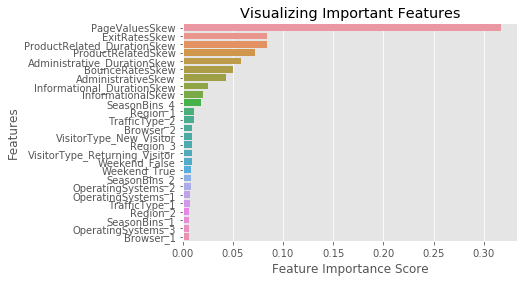

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Generating the Model on Selected Features

In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Pick the top features
# Split dataset into features and labels
# Features:
fs_X= rfdata[['PageValuesSkew','ExitRatesSkew','ProductRelated_DurationSkew','ProductRelatedSkew',
            'Administrative_DurationSkew','BounceRatesSkew','AdministrativeSkew',
            'Informational_DurationSkew','InformationalSkew','SeasonBins_4','Region_1',
            'TrafficType_2','Browser_2','VisitorType_New_Visitor','Region_3',
            'VisitorType_Returning_Visitor','Weekend_False','Weekend_True','SeasonBins_2',
             'OperatingSystems_2','OperatingSystems_1','TrafficType_1','Region_2','SeasonBins_1',
             'OperatingSystems_3','Browser_1']] 

# Labels:
fs_y=rfdata['RevenueEnc']    

# Split dataset into training set and test set
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(fs_X, fs_y, test_size=0.30, random_state=200) # 70% training and 30% test

After spliting, you will generate a model on the selected training set features, perform predictions on the selected test set features, and compare actual and predicted values. 

In [20]:
clf=RandomForestClassifier(random_state=200)
clf.fit(X_train_fs,y_train_fs)
y_pred_fs =clf.predict(X_test_fs)

print("F1_Score:",metrics.f1_score(y_test_fs, y_pred_fs))
print("AUC:",metrics.roc_auc_score(y_test_fs, y_pred_fs))
print(classification_report(y_test_fs, y_pred_fs))

F1_Score: 0.622093023255814
AUC: 0.758031775381616
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3126
           1       0.70      0.56      0.62       573

    accuracy                           0.89      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.89      0.89      0.89      3699



## __SMOTE Feature Selection__

In [21]:
sm = SMOTE(random_state = 123) 
X_train_smote_fs, y_train_smote_fs = sm.fit_sample(X_train_fs, y_train_fs) 

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
clf=RandomForestClassifier(random_state=200)
# fit the model with data
clf.fit(X_train_smote_fs,y_train_smote_fs)
# predict the model
y_pred_smote_fs=clf.predict(X_test_fs)

In [23]:
cnf_matrix = metrics.confusion_matrix(y_test_fs, y_pred_smote_fs)
cnf_matrix

array([[2894,  232],
       [ 173,  400]])

In [24]:
print("F1_Score:",metrics.f1_score(y_test_fs, y_pred_smote_fs))
print("AUC:",metrics.roc_auc_score(y_test_fs, y_pred_smote_fs))
print(classification_report(y_test_fs, y_pred_smote_fs))

F1_Score: 0.6639004149377593
AUC: 0.8119320142161838
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3126
           1       0.63      0.70      0.66       573

    accuracy                           0.89      3699
   macro avg       0.79      0.81      0.80      3699
weighted avg       0.90      0.89      0.89      3699

